# 데이터 수집

In [1]:
import yfinance as yf
import pandas as pd

def euro_indicator():
    tickers = {
        "DAX": "^GDAXI",
        "EUROSTOXX50": "^STOXX50E",
        "CAC": "^FCHI"
    }
    
    data_list = []
    
    for name, symbol in tickers.items():
        ticker = yf.Ticker(symbol)
        df = ticker.history(period="25y", interval="1d")
        df = df.reset_index()
        
    
        df = df[["Date", "Open", "High", "Low", "Close"]]
        df = df.rename(columns={
            "Open": f"{name}_Open",
            "High": f"{name}_High",
            "Low": f"{name}_Low",
            "Close": f"{name}_Close"
        })
        df["Date"] = pd.to_datetime(df["Date"]).dt.tz_localize(None)
        data_list.append(df)
    
    df_merged = data_list[0]
    for df in data_list[1:]:
        df['Date']=pd.to_datetime(df['Date'])
        df_merged = pd.merge(df_merged, df, on="Date", how="inner")
    
    df_merged['Date'] = pd.to_datetime(df_merged['Date']).dt.strftime('%Y-%m-%d')
    df_merged['Date'] = pd.to_datetime(df_merged['Date'])
    return df_merged

In [2]:
import cloudpickle
with open("euro_indicator.pkl", "wb") as f:
    cloudpickle.dump(euro_indicator, f)

In [3]:
euro_indi_df=euro_indicator()

In [4]:
def real_times(symbol):
    ticker = yf.Ticker(symbol)
    df = ticker.history(period=f"25y", interval="1d")
    
    df = df.copy()
    df = df[["Open", "High", "Low", "Close"]]
    df.columns = [f"{col}" for col in df.columns]
    df["Date"] = df.index.date
    df.reset_index(drop=True, inplace=True)
    # 변동량 계산
    df["Change"] = df["Close"].diff()
    
    df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
    
    df=df.reindex(columns=['Date','Close','Open','High','Low','Change'])
    return df

In [5]:
import cloudpickle
with open("real_times.pkl", "wb") as f:
    cloudpickle.dump(real_times, f)

In [6]:
euro_df=real_times('EURKRW=X')

In [7]:
all_df=pd.merge(euro_indi_df,euro_df,on='Date',how='inner')

In [8]:
all_df

,Date,DAX_Open,DAX_High,DAX_Low,DAX_Close,EUROSTOXX50_Open,EUROSTOXX50_High,EUROSTOXX50_Low,EUROSTOXX50_Close,CAC_Open,CAC_High,CAC_Low,CAC_Close,Close,Open,High,Low,Change
0,2007-03-30,6903.879883,6965.839844,6885.580078,6917.029785,4177.669922,4207.759766,4160.350098,4181.029785,5630.169922,5674.259766,5609.020020,5634.160156,1245.400024,1238.000000,1245.400024,1235.099976,7.400024
1,2007-04-02,6911.129883,6945.359863,6891.799805,6937.169922,4177.310059,4191.759766,4163.770020,4189.549805,5623.399902,5648.180176,5609.279785,5645.560059,1237.500000,1237.900024,1237.900024,1236.599976,-7.900024
2,2007-04-03,6945.359863,7053.120117,6945.270020,7045.560059,4199.540039,4248.069824,4199.540039,4246.299805,5681.649902,5713.529785,5669.279785,5711.910156,1237.699951,1237.500000,1237.699951,1237.300049,0.199951
3,2007-04-04,7072.509766,7076.209961,7038.490234,7073.910156,4252.709961,4261.830078,4242.049805,4261.830078,5730.279785,5739.009766,5707.390137,5739.009766,1233.900024,1237.699951,1237.699951,1233.900024,-3.799927
4,2007-04-05,7074.589844,7103.729980,7068.089844,7099.910156,4259.979980,4274.169922,4253.790039,4271.540039,5731.700195,5751.330078,5721.000000,5741.379883,1237.599976,1233.900024,1237.599976,1231.400024,3.699951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4569,2025-07-22,24236.089844,24237.410156,23921.830078,24041.900391,5332.319824,5332.319824,5277.850098,5290.479980,7775.040039,7782.660156,7726.740234,7744.410156,1615.589966,1615.359985,1623.520020,1610.000000,-0.180054
4570,2025-07-23,24246.800781,24310.960938,24122.189453,24240.820312,5305.589844,5371.350098,5305.589844,5344.250000,7839.709961,7869.959961,7816.270020,7850.430176,1620.390015,1619.920044,1620.609985,1610.579956,4.800049
4571,2025-07-24,24502.990234,24514.929688,24235.439453,24295.929688,5365.919922,5396.310059,5337.970215,5355.200195,7873.500000,7898.029785,7797.279785,7818.279785,1617.300049,1616.579956,1616.630005,1606.050049,-3.089966
4572,2025-07-25,24097.330078,24252.589844,24065.189453,24217.500000,5342.660156,5362.229980,5317.540039,5352.160156,7782.390137,7851.459961,7759.589844,7834.580078,1612.349976,1611.739990,1622.280029,1609.939941,-4.950073


In [9]:
df_base=all_df

# EDA

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

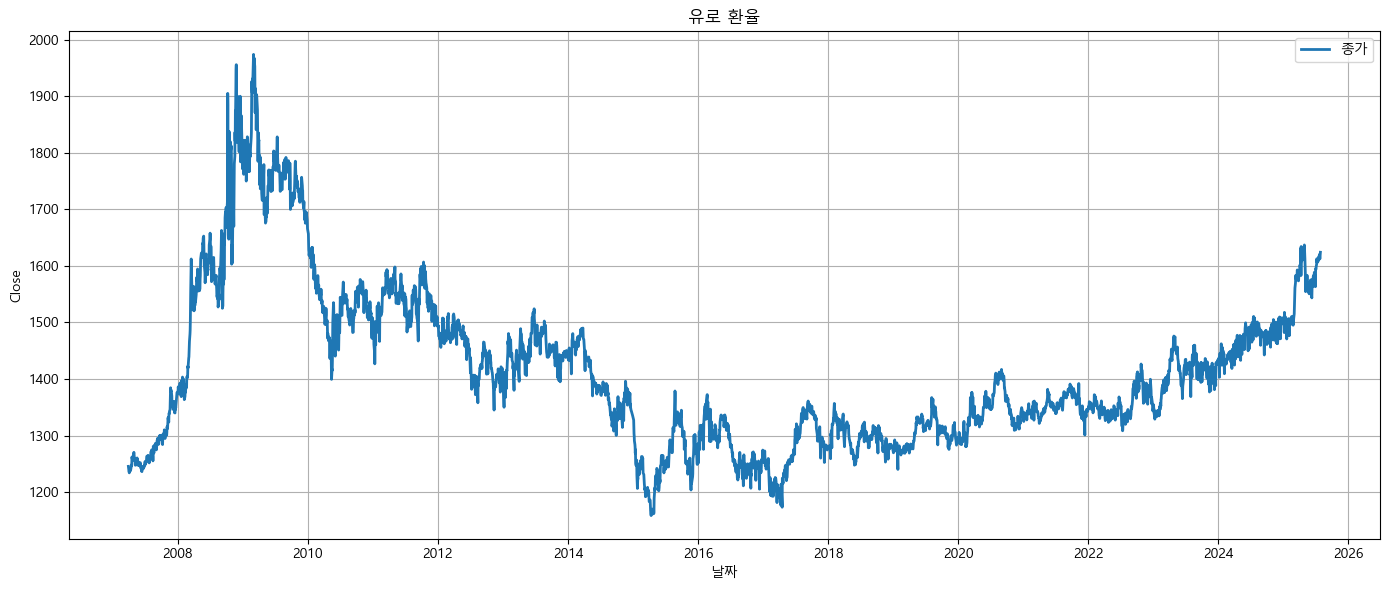

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(df_base['Date'], df_base['Close'], label='종가', linewidth=2)
plt.title("유로 환율")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

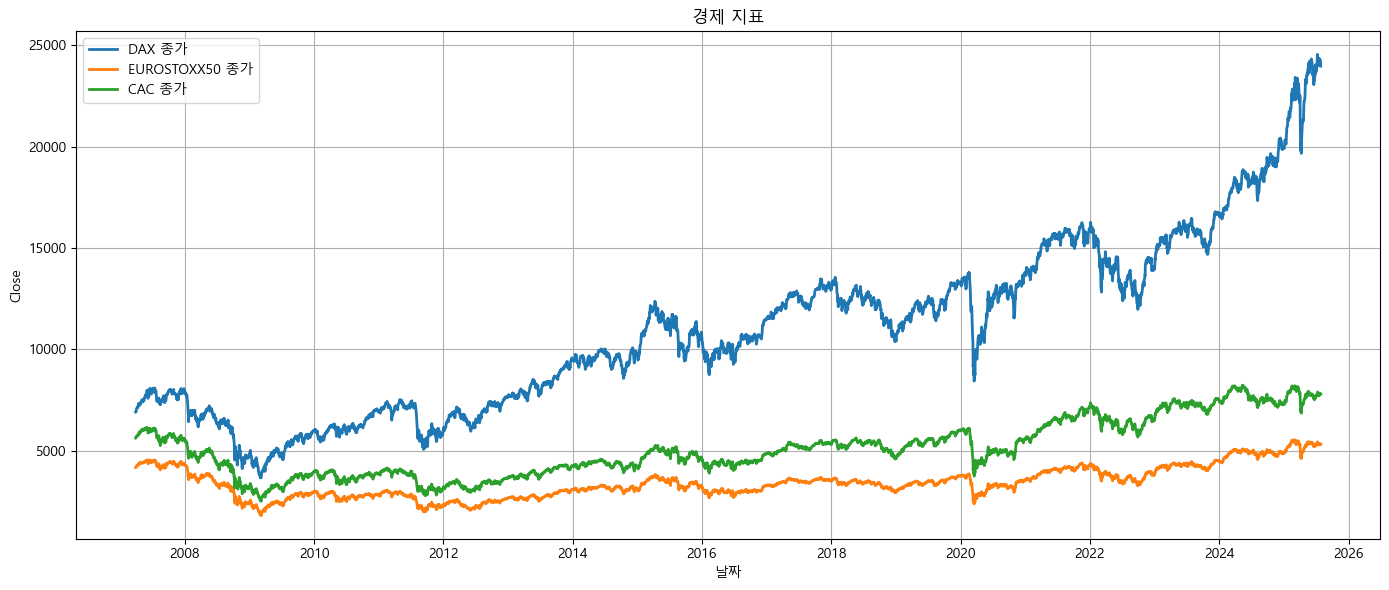

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(df_base['Date'], df_base['DAX_Close'], label='DAX 종가', linewidth=2)
plt.plot(df_base['Date'], df_base['EUROSTOXX50_Close'], label='EUROSTOXX50 종가', linewidth=2)
plt.plot(df_base['Date'], df_base['CAC_Close'], label='CAC 종가', linewidth=2)
plt.title("경제 지표")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

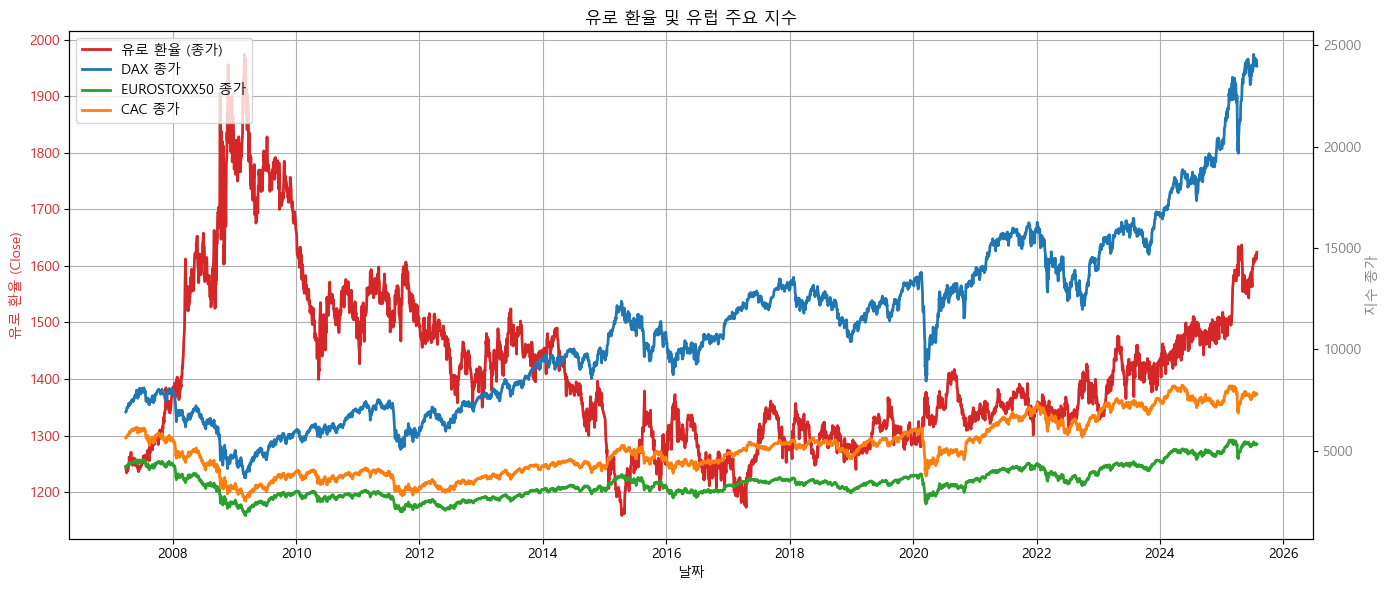

In [18]:
import matplotlib.pyplot as plt

# 이중 축 생성
fig, ax1 = plt.subplots(figsize=(14, 6))

# 왼쪽 y축: 유로 환율 (Close)
ax1.plot(df_base['Date'], df_base['Close'], label='유로 환율 (종가)', color='tab:red', linewidth=2)
ax1.set_xlabel("날짜")
ax1.set_ylabel("유로 환율 (Close)", color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True)

# 오른쪽 y축: 유럽 주요 지수
ax2 = ax1.twinx()
ax2.plot(df_base['Date'], df_base['DAX_Close'], label='DAX 종가', color='tab:blue', linewidth=2)
ax2.plot(df_base['Date'], df_base['EUROSTOXX50_Close'], label='EUROSTOXX50 종가', color='tab:green', linewidth=2)
ax2.plot(df_base['Date'], df_base['CAC_Close'], label='CAC 종가', color='tab:orange', linewidth=2)
ax2.set_ylabel("지수 종가", color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

# 범례 병합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 제목과 레이아웃
plt.title("유로 환율 및 유럽 주요 지수")
plt.tight_layout()
plt.show()

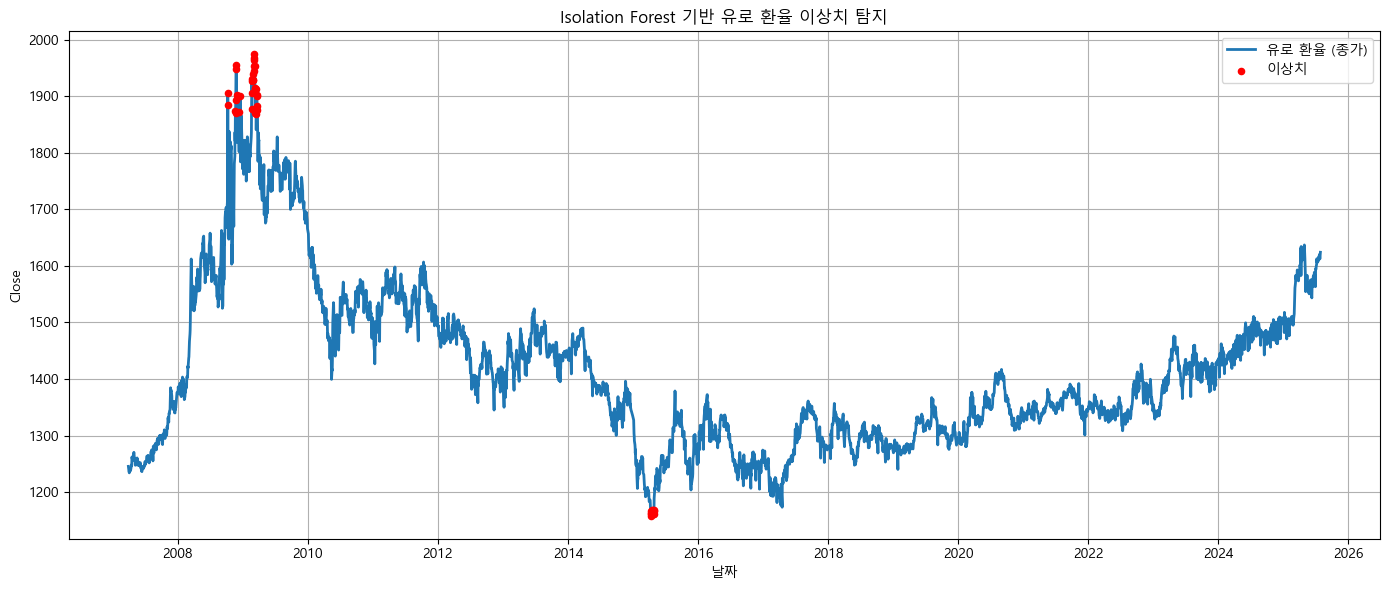

In [21]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1. 결측 제거 및 데이터 준비
df = df_base.copy()
df = df[['Date', 'Close']].dropna()

# 2. Isolation Forest 적용
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(df[['Close']])

# 3. 이상치 추출
anomalies = df[df['anomaly'] == -1]

# 4. 시각화
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='유로 환율 (종가)', color='tab:blue', linewidth=2)
plt.scatter(anomalies['Date'], anomalies['Close'], color='red', label='이상치', s=20, zorder=5)
plt.title("Isolation Forest 기반 유로 환율 이상치 탐지")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 하루 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
📊 XGBoost
    MAE:  6.1348
    RMSE: 9.2195
    R²:   0.9852
📊 LSTM
    MAE:  15.7104
    RMSE: 20.6398
    R²:   0.9260
📊 RandomForest
    MAE:  6.1681
    RMSE: 9.2339
    R²:   0.9852


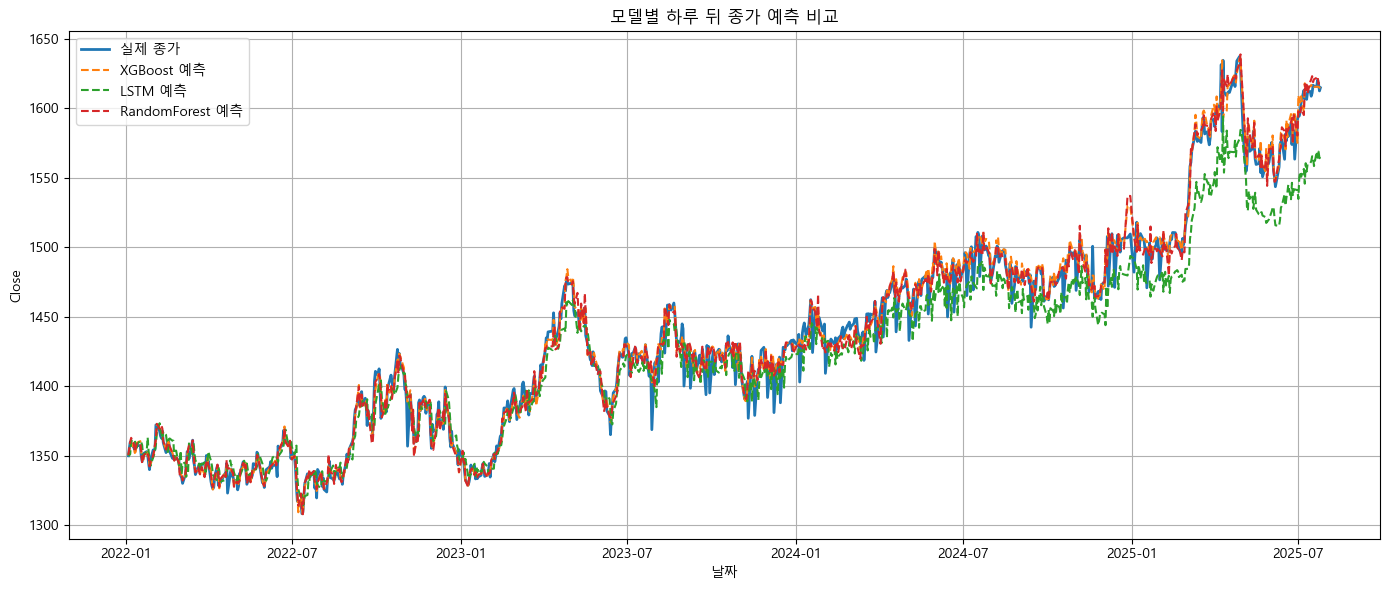

In [13]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()  # 기존 df_base를 유지
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-1)
df = df.dropna().reset_index(drop=True)

# 3. 피처, 타겟 설정
drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. 정규화
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. 모델 훈련 및 예측
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. 실제값 복원
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. 성능 출력
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"📊 {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R²:   {r2:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest 예측', linestyle='--')
plt.title("모델별 하루 뒤 종가 예측 비교")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import joblib
joblib.dump(model_xgb, 'euro_하루.pkl')
joblib.dump(scaler_X, 'euro_scaler_X_하루.pkl')
joblib.dump(scaler_y, 'euro_scaler_y_하루.pkl')

['euro_scaler_y_하루.pkl']

# 일주일 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
📊 XGBoost
    MAE:  25.7598
    RMSE: 34.7504
    R²:   0.7901
📊 LSTM
    MAE:  19.1710
    RMSE: 24.2130
    R²:   0.8981
📊 RandomForest
    MAE:  28.9319
    RMSE: 37.6581
    R²:   0.7535


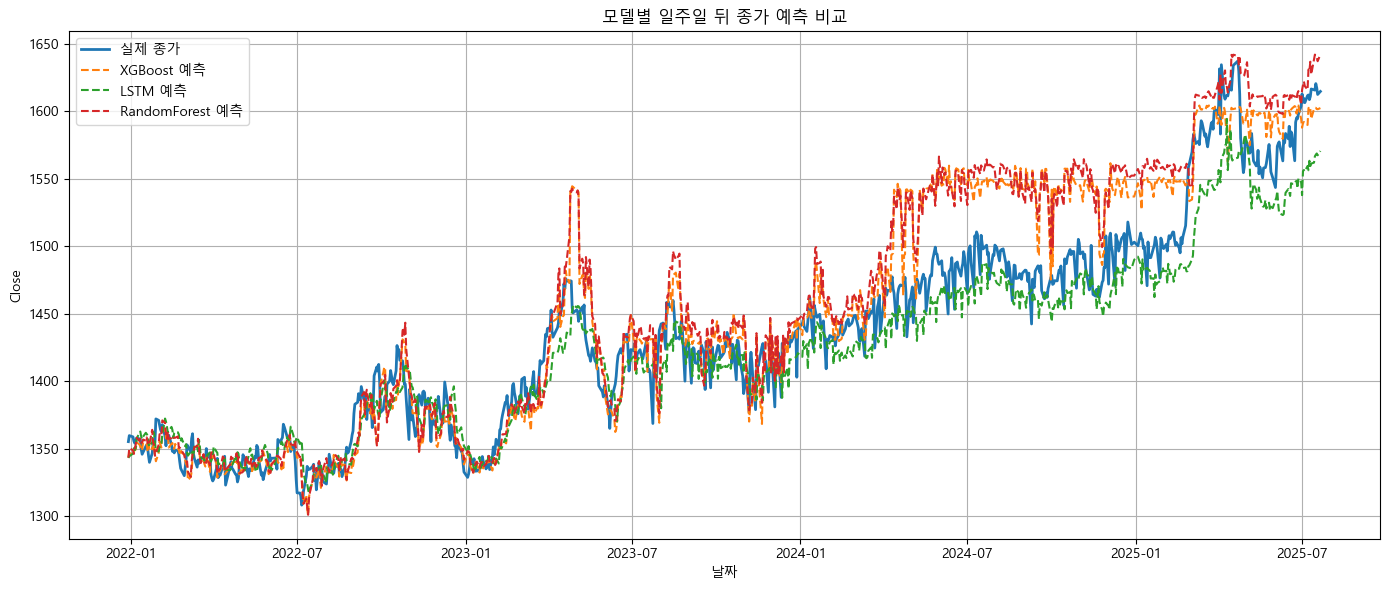

In [15]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()  # 기존 df_base를 유지
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-5)
df = df.dropna().reset_index(drop=True)

# 3. 피처, 타겟 설정
drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. 정규화
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. 모델 훈련 및 예측
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. 실제값 복원
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. 성능 출력
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"📊 {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R²:   {r2:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest 예측', linestyle='--')
plt.title("모델별 일주일 뒤 종가 예측 비교")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
import joblib
joblib.dump(model_lstm, 'euro_일주일.pkl')
joblib.dump(scaler_X, 'euro_scaler_X_일주일.pkl')
joblib.dump(scaler_y, 'euro_scaler_y_일주일.pkl')

['euro_scaler_y_일주일.pkl']

# 한달 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
📊 XGBoost
    MAE:  28.0224
    RMSE: 36.4390
    R²:   0.7691
📊 LSTM
    MAE:  25.8207
    RMSE: 33.3248
    R²:   0.8069
📊 RandomForest
    MAE:  25.7053
    RMSE: 33.6411
    R²:   0.8032


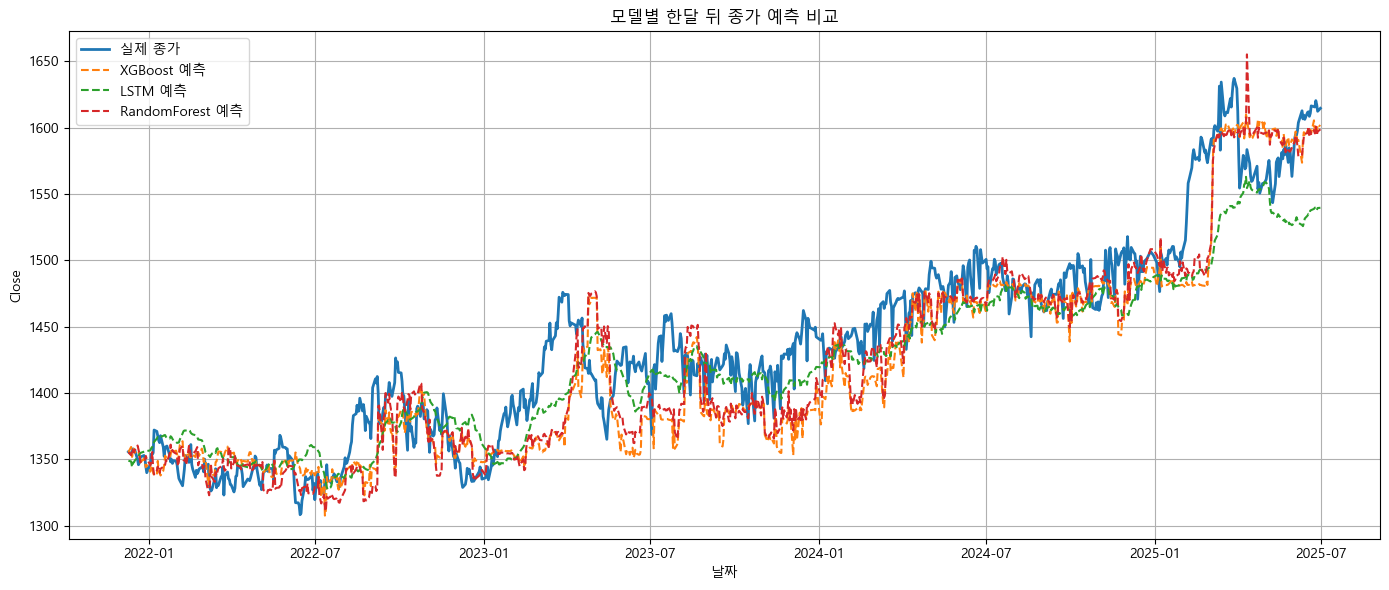

In [17]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()  # 기존 df_base를 유지
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-20)
df = df.dropna().reset_index(drop=True)

# 3. 피처, 타겟 설정
drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. 정규화
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. 모델 훈련 및 예측
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. 실제값 복원
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. 성능 출력
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"📊 {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R²:   {r2:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest 예측', linestyle='--')
plt.title("모델별 한달 뒤 종가 예측 비교")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
import joblib
joblib.dump(model_rf, 'euro_한달.pkl')
joblib.dump(scaler_X, 'euro_scaler_X_한달.pkl')
joblib.dump(scaler_y, 'euro_scaler_y_한달.pkl')

['euro_scaler_y_한달.pkl']

# 세달 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
📊 XGBoost
    MAE:  96.5469
    RMSE: 114.8570
    R²:   -1.2974
📊 LSTM
    MAE:  54.0293
    RMSE: 64.3504
    R²:   0.2789
📊 RandomForest
    MAE:  94.0279
    RMSE: 111.1568
    R²:   -1.1518


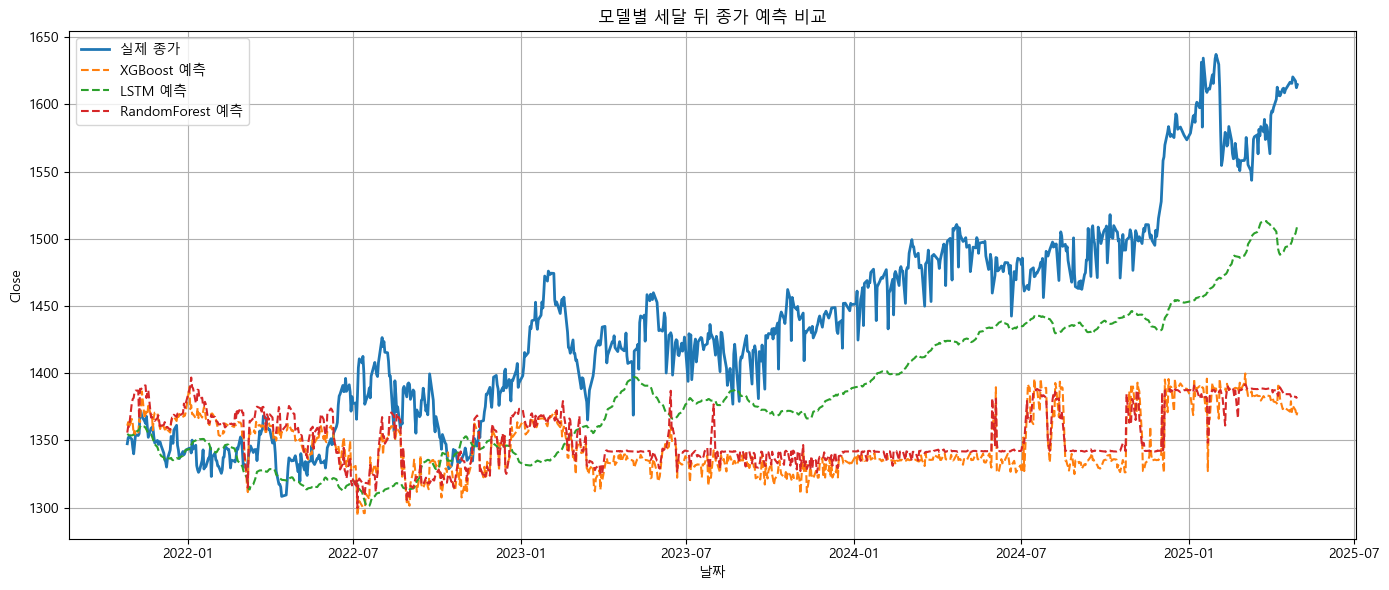

In [19]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()  # 기존 df_base를 유지
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-60)
df = df.dropna().reset_index(drop=True)

# 3. 피처, 타겟 설정
drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. 정규화
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. 모델 훈련 및 예측
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. 실제값 복원
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. 성능 출력
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"📊 {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R²:   {r2:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM 예측', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest 예측', linestyle='--')
plt.title("모델별 세달 뒤 종가 예측 비교")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
import joblib
joblib.dump(model_lstm, 'euro_세달.pkl')
joblib.dump(scaler_X, 'euro_scaler_X_세달.pkl')
joblib.dump(scaler_y, 'euro_scaler_y_세달.pkl')

['euro_scaler_y_세달.pkl']

|모델|하루|일주일|한달|세달|
|---|---|---|---|---|
|XGBoost|0.9852|0.7901|0.7691|-1.2974|
|LSTM|0.9466|0.8992|0.7093|0.3896|
|RandomForest|0.9852|0.7535|0.8032|-1.1518|
||||||
|최종모델|XGBoost|LSTM|RandomForest|LSTM

In [47]:
def euro_predict_하루(new_df):
    import joblib
    
    scaler_X = joblib.load(f'euro_scaler_X_하루.pkl')

    scaler_y = joblib.load(f'euro_scaler_y_하루.pkl')
    
    model_xgb = joblib.load(f'euro_하루.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_flat = X_new_scaled[seq_len:]

    y_pred_xgb = model_xgb.predict(X_new_flat)

    y_pred_xgb = scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1)).reshape(-1)

    return y_pred_xgb

import cloudpickle
with open("euro_predict_하루.pkl", "wb") as f:
    cloudpickle.dump(euro_predict_하루, f)

In [48]:
def euro_predict_일주일(new_df):
    import joblib
    
    scaler_X = joblib.load(f'euro_scaler_X_일주일.pkl')

    scaler_y = joblib.load(f'euro_scaler_y_일주일.pkl')
    
    model_lstm = joblib.load(f'euro_일주일.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    # 6. 결과 반환
    return y_pred_lstm

with open("euro_predict_일주일.pkl", "wb") as f:
    cloudpickle.dump(euro_predict_일주일, f)

In [49]:
def euro_predict_한달(new_df):
    import joblib
    
    scaler_X = joblib.load(f'euro_scaler_X_한달.pkl')

    scaler_y = joblib.load(f'euro_scaler_y_한달.pkl')
    
    model_rf = joblib.load(f'euro_한달.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_flat = X_new_scaled[seq_len:]

    y_pred_rf = model_rf.predict(X_new_flat)
    
    y_pred_rf = scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1)).reshape(-1)

    # 6. 결과 반환
    return y_pred_rf

with open("euro_predict_한달.pkl", "wb") as f:
    cloudpickle.dump(euro_predict_한달, f)

In [50]:
def euro_predict_세달(new_df):
    import joblib
    
    scaler_X = joblib.load(f'euro_scaler_X_세달.pkl')

    scaler_y = joblib.load(f'euro_scaler_y_세달.pkl')
    
    model_lstm = joblib.load(f'euro_세달.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    return y_pred_lstm

with open("euro_predict_세달.pkl", "wb") as f:
    cloudpickle.dump(euro_predict_세달, f)

In [51]:
print(list(X))

['DAX_Open', 'DAX_High', 'DAX_Low', 'DAX_Close', 'EUROSTOXX50_Open', 'EUROSTOXX50_High', 'EUROSTOXX50_Low', 'EUROSTOXX50_Close', 'CAC_Open', 'CAC_High', 'CAC_Low', 'CAC_Close', 'Close', 'Open', 'High', 'Low', 'Change']


In [58]:
def euro_predict(timelength):
    import pickle

    with open('real_times.pkl', 'rb') as f:
        real_times = pickle.load(f)
    
    with open('euro_indicator.pkl', 'rb') as f:
        euro_indicator = pickle.load(f)
    
    new_df=pd.merge(real_times('EURKRW=X'),euro_indicator(),on='Date').tail(21)
    X_new = new_df[['DAX_Open', 'DAX_High', 'DAX_Low', 'DAX_Close', 'EUROSTOXX50_Open', 'EUROSTOXX50_High', 'EUROSTOXX50_Low', 'EUROSTOXX50_Close', 'CAC_Open', 'CAC_High', 'CAC_Low', 'CAC_Close', 'Close', 'Open', 'High', 'Low', 'Change']]

    with open(f'euro_predict_{timelength}.pkl', 'rb') as f:
        model_predict = pickle.load(f)
        
    result_df = pd.DataFrame({
        "Date": new_df['Date'].iloc[-1],
        "Previous Close": new_df['Close'].iloc[-1],
        "Predicted Close": model_predict(X_new),
        "예측결과": np.where(model_predict(X_new) > new_df['Close'].iloc[-1], "상승", "하락")
    })
    
    return result_df
    
with open("euro_predict.pkl", "wb") as f:
    cloudpickle.dump(euro_predict, f)

In [59]:
euro_predict('일주일')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


,Date,Previous Close,Predicted Close,예측결과
0,2025-07-28,1614.900024,1567.639526,하락
